In [1]:
# Ensures the code runs
import sys
import os

os.chdir("..")
print("Now in:", os.getcwd)

# Add parent directory to path so Python can file the 'data/' module
sys.path.append(os.path.abspath(".."))

Now in: <built-in function getcwd>


### Step 1: Setup & Load Data

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from data.load_beauty_data import get_beauty_dataset
from preprocessing.clean_and_label import load_ingredient_blacklist, label_dataframe

In [4]:
# Load and label dataset
df = get_beauty_dataset()
harmful_set = load_ingredient_blacklist()
df = label_dataframe(df, harmful_set)

In [8]:
# Preview
df[['ingredients_text', 'label']].head()

,ingredients_text,label
4,"alcohol denat. (SD alcohol 39C), aqua (water),...",1
5,"ethyl & but copolymhyl acetate, dimethicone, c...",1
7,"Aqua, Sodium C14-16 Olefin Sulfonate, Glycol S...",1
9,"Aqua, Theobroma Cacao Extract, Glycerin, Glyce...",1
15,"Organic Coconut Oil, Organic Palm Oil, Sodium ...",1


### Step 2: Preprocessing (TF-IDF)

In [9]:
# TF-IDF vectorization
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

X = tfidf.fit_transform(df['ingredients_text'])
y = df['label']

print("TF-IDF shape:", X.shape)

TF-IDF shape: (14293, 5000)


### Step 3: Train-Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Step 4: Train a Logistic Regression Classifier

In [11]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

### Step 5: Evaluate Performace

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       494
           1       0.97      0.98      0.98      2365

    accuracy                           0.96      2859
   macro avg       0.94      0.93      0.93      2859
weighted avg       0.96      0.96      0.96      2859



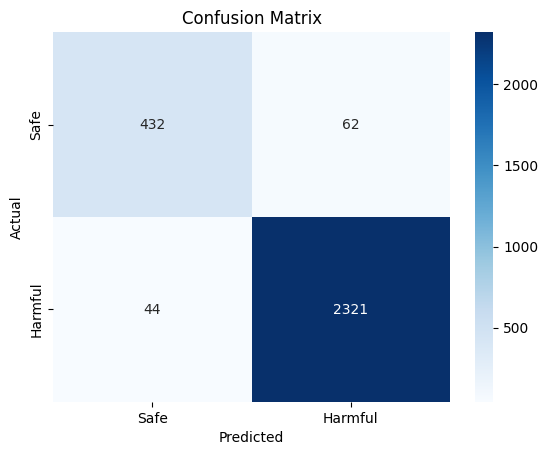

In [12]:
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Safe", "Harmful"], yticklabels=["Safe", "Harmful"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Step 1: Import TensorFlow

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Step 2: Use the Same TF-IDF Vectors

In [8]:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf.fit_transform(df['ingredients_text'])
y = df['label']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Step 3: Convert to TensorFlow-friendly format

In [9]:
import numpy as np

X_train_tf = X_train.toarray()
X_test_tf = X_test.toarray()
y_train_tf = np.array(y_train)
y_test_tf = np.array(y_test)

## Step 4: Define and Compile the MLP

In [10]:
model = keras.Sequential([
    layers.Input(shape=(X_train_tf.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')   # Binary classification
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       640,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 648,449 (2.47 MB)

 Trainable params: 648,449 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

## Step 5: Train the Model

In [11]:
history = model.fit(
    X_train_tf, y_train_tf,
    validation_data=(X_test_tf, y_test_tf),
    epochs=10,
    batch_size=32
)

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8664 - loss: 0.3140 - val_accuracy: 0.9631 - val_loss: 0.0961
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9834 - loss: 0.0456 - val_accuracy: 0.9683 - val_loss: 0.0867
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9965 - loss: 0.0158 - val_accuracy: 0.9672 - val_loss: 0.0988
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9978 - loss: 0.0087 - val_accuracy: 0.9690 - val_loss: 0.1156
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9983 - loss: 0.0066 - val_accuracy: 0.9672 - val_loss: 0.1263
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9994 - loss: 0.0035 - val_accuracy: 0.9676 - val_loss: 0.1312
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9996 - loss: 0.0017 - val_accuracy: 0.9676 - val_loss: 0.1421
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9994 - loss: 0.0020 - val_accuracy: 0.

In [12]:
import os
os.makedirs("models", exist_ok=True)

In [13]:
# Save entire model to disk
model.save("models/mlp_harmful_ingredient_classifier.keras")

In [14]:
model.save("models/mlp_harmful_ingredient_classifier.h5")


### Load it later ( any notebook or script)

In [15]:
from tensorflow import keras
model = keras.models.load_model("models/mlp_harmful_ingredient_classifier.keras")


### save training history

In [16]:
import pickle

with open("models/mlp_training_history.pkl", "wb") as f:
    pickle.dump(history.history, f)


### to load later

In [ ]:
with open("models/mlp_training_history.pkl", "rb") as f:
    history_data = pickle.load(f)

## Step 6: Visualize Training Progress (loss/accuracy plots)

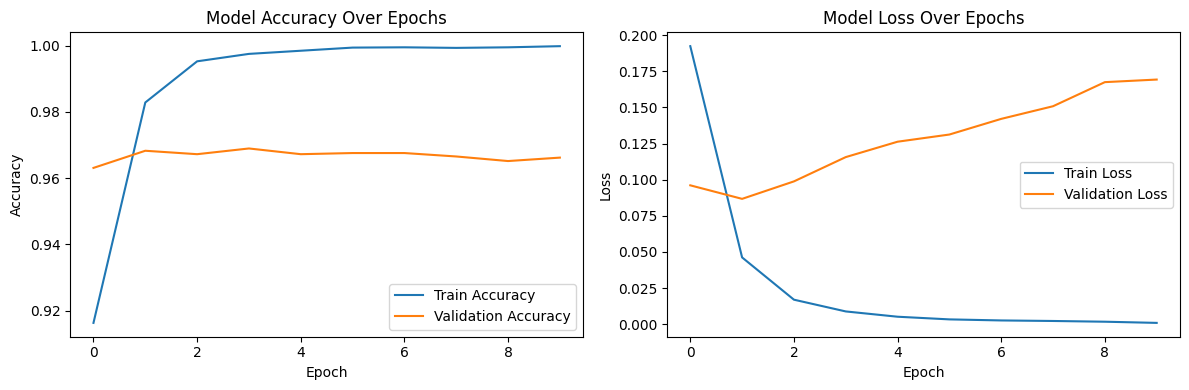

In [17]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
os.makedirs("plots", exist_ok=True)

plt.savefig("plots/mlp_training_curves.png", dpi=300)


<Figure size 640x480 with 0 Axes>

## Step 7: Evaluate the Model

In [18]:
from sklearn.metrics import classification_report
y_pred_probs = model.predict(X_test_tf)
y_pred = (y_pred_probs > 0.5).astype(int)

print(classification_report(y_test_tf, y_pred))

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       503
           1       0.98      0.98      0.98      2397

    accuracy                           0.97      2900
   macro avg       0.95      0.93      0.94      2900
weighted avg       0.97      0.97      0.97      2900



In [21]:
from sklearn.metrics import classification_report

os.makedirs("results", exist_ok=True)


report = classification_report(y_test_tf, y_pred, target_names=["Safe", "Harmful"])
print(report)  # Optional: display in notebook

# Save to file
with open("results/mlp_classification_report.txt", "w") as f:
    f.write(report)


              precision    recall  f1-score   support

        Safe       0.92      0.89      0.90       503
     Harmful       0.98      0.98      0.98      2397

    accuracy                           0.97      2900
   macro avg       0.95      0.93      0.94      2900
weighted avg       0.97      0.97      0.97      2900

